<a href="https://colab.research.google.com/github/GIBSONGODSAN/MachineLearningAlgorithms/blob/main/EnsembleTechniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ENSEMBLE TECHNIQUES

Ensemble techniques combine multiple machine learning models to improve accuracy and reduce overfitting. Some popular ensemble techniques are as follows:

Choose an ensemble technique: Select one or more ensemble techniques, such as Bagging, Boosting, Stacking, Random Forest, or Gradient Boosting Machines.

Train multiple models: Train multiple instances of the same model, or multiple different models, using the training dataset.

Combine model predictions: Combine the predictions of each model using a specific technique, such as averaging for Bagging and Random Forest, or weighted averaging for Boosting and Gradient Boosting Machines.

Evaluate the ensemble model: Evaluate the performance of the ensemble model using a validation dataset, and adjust the hyperparameters of the models as needed.

Make predictions: Once the ensemble model has been trained and validated, use it to make predictions for new input data by combining the predictions of each individual model.

Ensemble techniques can improve the accuracy and robustness of machine learning models by leveraging the strengths of multiple models, and by reducing the variance and bias of the model. The key to successfully applying ensemble techniques is to choose the right combination of models and techniques, and to optimize the hyperparameters of each individual model.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [4]:
X, y = make_moons(n_samples=500, noise=0.30)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
log = LogisticRegression()
rnd = RandomForestClassifier(n_estimators=100)
svm = SVC()
voting = VotingClassifier(
    estimators=[('logistics_regression', log), ('random_forest', rnd), ('support_vector_machine', svm)],
    voting='hard')

In [6]:
voting.fit(X_train, y_train)
VotingClassifier (estimators=[('logistics_regression',LogisticRegression (random_state=42)),('random forest',RandomForestClassifier (random_state=42)),('support_vector_machine', SVC (random_state=42))])

VotingClassifier(estimators=[('logistics_regression',
                              LogisticRegression(random_state=42)),
                             ('random forest',
                              RandomForestClassifier(random_state=42)),
                             ('support_vector_machine', SVC(random_state=42))])

In [7]:
for clf in (log, rnd, svm, voting):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.824
RandomForestClassifier 0.904
SVC 0.896
VotingClassifier 0.888


In [8]:
bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=250,
    max_samples=100, bootstrap=True, random_state=101)

In [9]:
bagging_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=250, random_state=101)

In [10]:
y_pred = bagging_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.912


In [11]:
bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=250,
    bootstrap=True, oob_score=True, random_state=101)

In [12]:
bagging_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=250,
                  oob_score=True, random_state=101)

In [13]:
bagging_clf.oob_score_

0.92

In [14]:
random_forest_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42,n_jobs=-1)
random_forest_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [15]:
y_pred_random_forest = random_forest_clf.predict(X_test)

In [16]:
bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(max_leaf_nodes=16),
    n_estimators=500, random_state=101)

In [17]:
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)

In [20]:
np.sum(y_pred_bagging == y_pred_random_forest) / len(y_pred_bagging)

0.992

In [21]:
from sklearn.datasets import load_iris
iris = load_iris()

In [22]:
rand_forest_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rand_forest_clf.fit(iris["data"], iris["target"])

RandomForestClassifier(n_estimators=500, random_state=42)

In [23]:
for feature, score in zip(iris["feature_names"], rand_forest_clf.feature_importances_):
    print(feature, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


In [24]:
import tensorflow.keras as keras

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [25]:
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [26]:
rand_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rand_forest_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier(random_state=42)

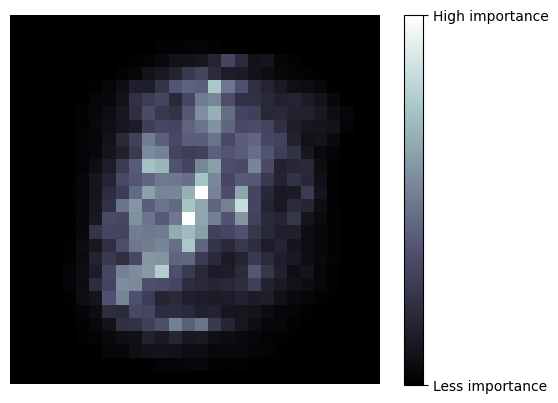

In [27]:
image = rand_forest_clf.feature_importances_.reshape(28, 28)
plt.imshow(image, cmap = mpl.cm.bone,interpolation="nearest")
plt.axis("off")
cbar = plt.colorbar(ticks=[rand_forest_clf.feature_importances_.min(), rand_forest_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Less importance', 'High importance'])
plt.show()

In [ ]:
adaboost_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
adaboost_clf.fit(X_train, y_train)

In [ ]:
print(X_train.shape)
print(y_train.shape)


(375, 2)
(60000,)
